In [1]:
# Import our dependencies

import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from IPython.display import Image, SVG
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
import tensorflow_hub as hub
import matplotlib.pylab as plt
from __future__ import absolute_import, division, print_function, unicode_literals
np.random.seed(0)
from keras.models import load_model
from keras.preprocessing import image
import cv2

In [2]:
# Import drive to load images stored in google drive due to file size

from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [3]:
import os

# Path to the zip file

# Jacks's path
# zip_file_path = '/content/gdrive/MyDrive/Project_4/stanford_dogs/cropped/test/n02116738-African_hunting_dog/n02116738_8945.jpg'

# Dena's path
zip_file_path = '/content/gdrive/MyDrive/Project_4/stanford_dogs/n02116738-African_hunting_dog'

# Verify if the zip file exists
if os.path.exists(zip_file_path):
    print("Zip file exists.")
else:
    print("Zip file does not exist. Please check the file path.")

Zip file exists.


In [4]:
# Saving images to a variable

# Jack's path
# data_root = '/content/gdrive/MyDrive/Project_4/stanford_dogs/cropped/train'

# Dena's path
data_root = '/content/gdrive/MyDrive/Project_4/stanford_dogs'

In [5]:
# Preparing the training and test data

IMAGE_SHAPE = (224, 224)
TRAINING_DATA_DIR = str(data_root)
print(TRAINING_DATA_DIR);

datagen_kwargs = dict(rescale=1./255, validation_split=.20)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
  TRAINING_DATA_DIR,
  subset="validation",
  shuffle=True,
  target_size=IMAGE_SHAPE
  )
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
  TRAINING_DATA_DIR,
  subset="training",
  shuffle=True,
  target_size=IMAGE_SHAPE
  )

/content/gdrive/MyDrive/Project_4/stanford_dogs
Found 4072 images belonging to 120 classes.
Found 16508 images belonging to 120 classes.


In [6]:
# Loading the image and label batch shape.  Printing all of the data set labels.

image_batch_train, label_batch_train = next(iter(train_generator))
print("Image batch shape: ", image_batch_train.shape)
print("Label batch shape: ", label_batch_train.shape)
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 120)
['N02085620-Chihuahua' 'N02085782-Japanese_Spaniel'
 'N02085936-Maltese_Dog' 'N02086079-Pekinese' 'N02086240-Shih-Tzu'
 'N02086646-Blenheim_Spaniel' 'N02086910-Papillon' 'N02087046-Toy_Terrier'
 'N02087394-Rhodesian_Ridgeback' 'N02088094-Afghan_Hound'
 'N02088238-Basset' 'N02088364-Beagle' 'N02088466-Bloodhound'
 'N02088632-Bluetick' 'N02089078-Black-And-Tan_Coonhound'
 'N02089867-Walker_Hound' 'N02089973-English_Foxhound' 'N02090379-Redbone'
 'N02090622-Borzoi' 'N02090721-Irish_Wolfhound'
 'N02091032-Italian_Greyhound' 'N02091134-Whippet'
 'N02091244-Ibizan_Hound' 'N02091467-Norwegian_Elkhound'
 'N02091635-Otterhound' 'N02091831-Saluki' 'N02092002-Scottish_Deerhound'
 'N02092339-Weimaraner' 'N02093256-Staffordshire_Bullterrier'
 'N02093428-American_Staffordshire_Terrier' 'N02093647-Bedlington_Terrier'
 'N02093754-Border_Terrier' 'N02093859-Kerry_Blue_Terrier'
 'N02093991-Irish_Terrier' 'N02094114-Norfolk_Terrier'
 'N0

In [7]:
# Define the neural network model

model = tf.keras.Sequential([
hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
output_shape=[1280],
trainable=False),
tf.keras.layers.Dropout(0.4),
tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])
model.build([None, 224, 224, 3])

# Check the summary of the model
model.summary()
model.compile(
optimizer=tf.keras.optimizers.Adam(),
loss='categorical_crossentropy',
metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 120)               153720    
                                                                 
Total params: 2411704 (9.20 MB)
Trainable params: 153720 (600.47 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [8]:
# Train the model

steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)
hist = model.fit(
train_generator,
epochs=20,
verbose=1,
steps_per_epoch=steps_per_epoch,
validation_data=valid_generator,
validation_steps=val_steps_per_epoch).history

Epoch 1/20
516/516 [==============================] - 4997s 10s/step - loss: 1.3740 - acc: 0.6427 - val_loss: 0.6913 - val_acc: 0.7861
Epoch 2/20
516/516 [==============================] - 111s 215ms/step - loss: 0.5846 - acc: 0.8161 - val_loss: 0.6376 - val_acc: 0.7969
Epoch 3/20
516/516 [==============================] - 108s 209ms/step - loss: 0.4473 - acc: 0.8555 - val_loss: 0.6112 - val_acc: 0.8121
Epoch 4/20
516/516 [==============================] - 110s 213ms/step - loss: 0.3724 - acc: 0.8758 - val_loss: 0.6181 - val_acc: 0.8084
Epoch 5/20
516/516 [==============================] - 111s 215ms/step - loss: 0.3146 - acc: 0.8965 - val_loss: 0.6126 - val_acc: 0.8102
Epoch 6/20
516/516 [==============================] - 111s 214ms/step - loss: 0.2804 - acc: 0.9037 - val_loss: 0.6240 - val_acc: 0.8146
Epoch 7/20
516/516 [==============================] - 107s 208ms/step - loss: 0.2479 - acc: 0.9187 - val_loss: 0.6571 - val_acc: 0.8035
Epoch 8/20
516/516 [=============================

In [9]:
# Jack's saved_model_path

# saved_model_path = "/content/gdrive/MyDrive/Project_4/dog_model_2.h5"
# #model.save(saved_model_path) #save your model

# # to reload the model

# model = tf.keras.models.load_model(
#        (saved_model_path),
#        custom_objects={'KerasLayer':hub.KerasLayer}
# )

# Dena's saved_model_path

saved_model_path = "/content/gdrive/MyDrive/Project_4/model"

model.save('saved_model_path.keras', save_format="h5")

# to reload the model

model = tf.keras.models.load_model(
       ('saved_model_path.keras'),
       custom_objects={'KerasLayer':hub.KerasLayer}
)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
# Compile the model

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
# Create a DataFrame of the model history

hist = pd.DataFrame(hist)
hist['epoch'] = hist.index+1
hist.head()

,loss,acc,val_loss,val_acc,epoch
0,1.373994,0.642658,0.691256,0.786100,1
1,0.584614,0.816150,0.637582,0.796906,2
2,0.447301,0.855464,0.611198,0.812132,3
3,0.372444,0.875818,0.618115,0.808448,4
4,0.314594,0.896535,0.612612,0.810167,5


In [13]:
# Evaluate the model using the test data

loss, accuracy = model.evaluate(image_batch_train, label_batch_train, verbose=1)
print(f"Loss: {loss}, Accuracy: {accuracy}")

1/1 [==============================] - 1s 787ms/step - loss: 0.0189 - accuracy: 1.0000
Loss: 0.01885356195271015, Accuracy: 1.0


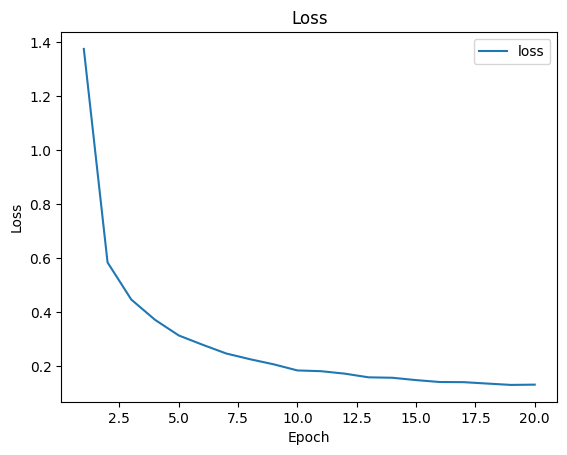

In [14]:
# Use py.plot to plot the loss for each epoch

hist.plot(x='epoch', y='loss', title='Loss')
ylabel = 'Loss'
xlabel = 'Epoch'
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

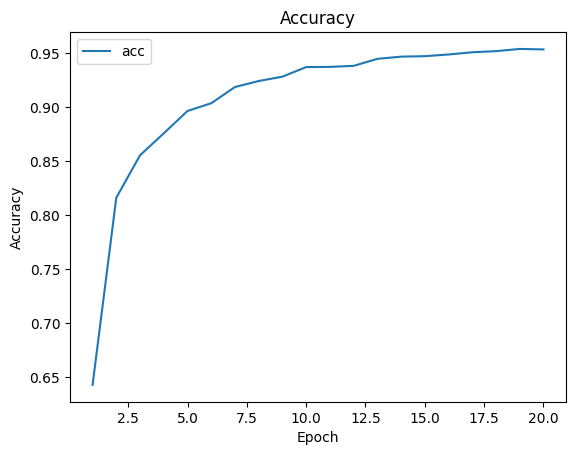

In [15]:
# Use py.plot to plot the accuracy for each epoch

hist.plot(x='epoch', y='acc')
ylabel = 'Accuracy'
xlabel = 'Epoch'
plt.title(ylabel)
plt.ylabel(ylabel)
plt.xlabel(xlabel)
plt.show()

In [52]:
# Read in predicted images

img = cv2.imread('/content/gdrive/MyDrive/Project_4/misc_dogs/toy_poodle.jpg')
img = cv2.resize(img,(224,224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

predictions = model.predict(img_array)


predicted_class = np.argmax(predictions, axis=1)
print("Predicted class:", predicted_class)
dataset_labels[predicted_class]

1/1 [==============================] - 1s 1s/step
Predicted class: [113]


array(['N02113624-Toy_Poodle'], dtype='<U40')

In [53]:
# Validating the batch shape

val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 224, 224, 3)


In [54]:
# Making some predictions using the test data.

pd.set_option('display.max_columns', None)
tf_model_predictions = model.predict(val_image_batch)
tf_pred_dataframe = pd.DataFrame(tf_model_predictions)
tf_pred_dataframe.columns = dataset_labels
print("Prediction results for the first elements")
tf_pred_dataframe.head(1)

1/1 [==============================] - 0s 50ms/step
Prediction results for the first elements


,N02085620-Chihuahua,N02085782-Japanese_Spaniel,N02085936-Maltese_Dog,N02086079-Pekinese,N02086240-Shih-Tzu,N02086646-Blenheim_Spaniel,N02086910-Papillon,N02087046-Toy_Terrier,N02087394-Rhodesian_Ridgeback,N02088094-Afghan_Hound,N02088238-Basset,N02088364-Beagle,N02088466-Bloodhound,N02088632-Bluetick,N02089078-Black-And-Tan_Coonhound,N02089867-Walker_Hound,N02089973-English_Foxhound,N02090379-Redbone,N02090622-Borzoi,N02090721-Irish_Wolfhound,N02091032-Italian_Greyhound,N02091134-Whippet,N02091244-Ibizan_Hound,N02091467-Norwegian_Elkhound,N02091635-Otterhound,N02091831-Saluki,N02092002-Scottish_Deerhound,N02092339-Weimaraner,N02093256-Staffordshire_Bullterrier,N02093428-American_Staffordshire_Terrier,N02093647-Bedlington_Terrier,N02093754-Border_Terrier,N02093859-Kerry_Blue_Terrier,N02093991-Irish_Terrier,N02094114-Norfolk_Terrier,N02094258-Norwich_Terrier,N02094433-Yorkshire_Terrier,N02095314-Wire-Haired_Fox_Terrier,N02095570-Lakeland_Terrier,N02095889-Sealyham_Terrier,N02096051-Airedale,N02096177-Cairn,N02096294-Australian_Terrier,N02096437-Dandie_Dinmont,N02096585-Boston_Bull,N02097047-Miniature_Schnauzer,N02097130-Giant_Schnauzer,N02097209-Standard_Schnauzer,N02097298-Scotch_Terrier,N02097474-Tibetan_Terrier,N02097658-Silky_Terrier,N02098105-Soft-Coated_Wheaten_Terrier,N02098286-West_Highland_White_Terrier,N02098413-Lhasa,N02099267-Flat-Coated_Retriever,N02099429-Curly-Coated_Retriever,N02099601-Golden_Retriever,N02099712-Labrador_Retriever,N02099849-Chesapeake_Bay_Retriever,N02100236-German_Short-Haired_Pointer,N02100583-Vizsla,N02100735-English_Setter,N02100877-Irish_Setter,N02101006-Gordon_Setter,N02101388-Brittany_Spaniel,N02101556-Clumber,N02102040-English_Springer,N02102177-Welsh_Springer_Spaniel,N02102318-Cocker_Spaniel,N02102480-Sussex_Spaniel,N02102973-Irish_Water_Spaniel,N02104029-Kuvasz,N02104365-Schipperke,N02105056-Groenendael,N02105162-Malinois,N02105251-Briard,N02105412-Kelpie,N02105505-Komondor,N02105641-Old_English_Sheepdog,N02105855-Shetland_Sheepdog,N02106030-Collie,N02106166-Border_Collie,N02106382-Bouvier_Des_Flandres,N02106550-Rottweiler,N02106662-German_Shepherd,N02107142-Doberman,N02107312-Miniature_Pinscher,N02107574-Greater_Swiss_Mountain_Dog,N02107683-Bernese_Mountain_Dog,N02107908-Appenzeller,N02108000-Entlebucher,N02108089-Boxer,N02108422-Bull_Mastiff,N02108551-Tibetan_Mastiff,N02108915-French_Bulldog,N02109047-Great_Dane,N02109525-Saint_Bernard,N02109961-Eskimo_Dog,N02110063-Malamute,N02110185-Siberian_Husky,N02110627-Affenpinscher,N02110806-Basenji,N02110958-Pug,N02111129-Leonberg,N02111277-Newfoundland,N02111500-Great_Pyrenees,N02111889-Samoyed,N02112018-Pomeranian,N02112137-Chow,N02112350-Keeshond,N02112706-Brabancon_Griffon,N02113023-Pembroke,N02113186-Cardigan,N02113624-Toy_Poodle,N02113712-Miniature_Poodle,N02113799-Standard_Poodle,N02113978-Mexican_Hairless,N02115641-Dingo,N02115913-Dhole,N02116738-African_Hunting_Dog
0,5.391448e-15,6.245156e-22,3.580118e-19,1.137023e-15,1.053675e-14,9.117669e-19,2.529296e-21,5.767237e-15,3.970137e-12,1.820837e-15,5.538208e-12,6.819504e-10,1.390763e-08,1.0,9.453471e-10,9.208131e-11,2.122135e-14,1.005199e-12,2.575250e-20,4.422894e-13,7.795484e-19,5.740043e-15,6.115438e-17,1.804668e-17,2.913760e-11,7.417193e-12,3.283568e-14,8.725313e-16,9.263884e-15,1.448297e-14,1.032892e-17,8.164925e-11,2.836432e-11,1.818548e-13,2.064799e-14,3.068217e-16,5.404789e-16,5.261756e-15,3.912602e-10,7.860672e-19,4.848775e-10,3.060989e-18,1.106955e-12,3.413396e-13,6.478189e-17,6.925330e-12,6.481283e-16,4.731034e-11,2.736870e-18,6.364692e-13,5.003777e-11,1.235812e-13,2.150616e-15,1.113353e-14,1.685262e-18,4.104028e-13,3.254045e-19,1.490491e-13,7.248210e-15,3.017291e-07,4.484122e-12,1.055077e-10,1.612969e-15,3.237082e-12,3.243819e-12,2.870510e-13,1.031023e-15,2.238866e-14,8.512875e-12,7.173887e-14,5.651677e-15,1.122898e-16,2.363902e-21,3.192394e-20,2.379117e-15,9.223857e-16,1.151729e-09,3.266138e-16,1.012273e-16,1.071342e-15,3.730989e-14,3.965641e-20,8.621982e-16,1.104370e-12,1.4

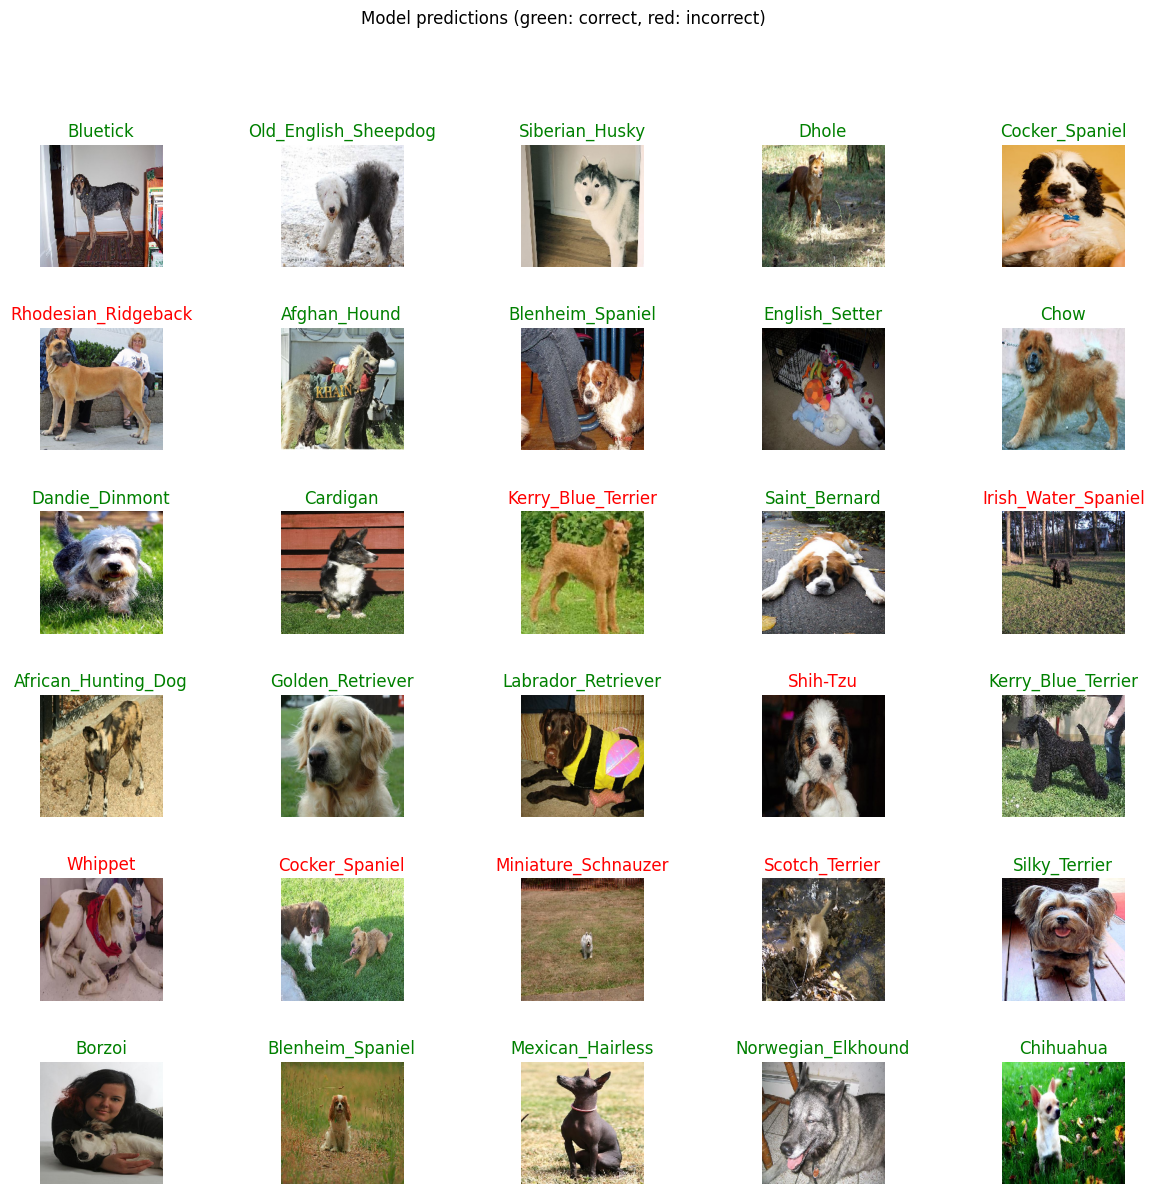

In [55]:
# Creating plot showing predicted images and labeling these images based on correct or incorrect breed

predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(15,13.5))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(val_image_batch[n])
  color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
  plt.title(predicted_labels[n].title().split("-",1)[1], color=color)
  plt.axis('off')
  _ = plt.suptitle("Model predictions (green: correct, red: incorrect)")